In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('C:/Users/HP/Desktop/data sets/spam.csv',encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data.shape

(5572, 5)

In [7]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
data.columns

Index(['target', 'text'], dtype='object')

In [10]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
data.isna().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data=data.drop_duplicates(keep='first')

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(5169, 2)

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['target']=le.fit_transform(data['target'])

In [17]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


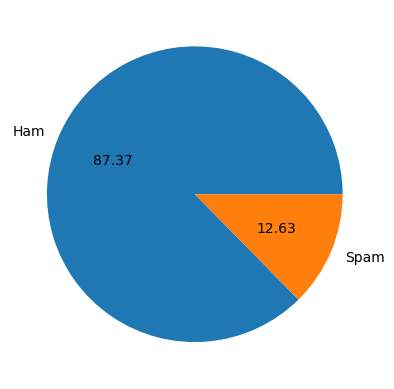

In [20]:
plt.pie(data['target'].value_counts(),labels=['Ham','Spam'],autopct='%.2f')
plt.show()

In [21]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
data['num_chars']=data['text'].apply(len)

In [23]:
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
data['num_words']=data['text'].apply(lambda x:len(word_tokenize(x)))

In [25]:
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
data['num_sents']=data['text'].apply(lambda x:len(sent_tokenize(x)))

In [27]:
data.head()

,target,text,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#targetting ham
data[data['target']==0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#targetting spam
data[data['target']==1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

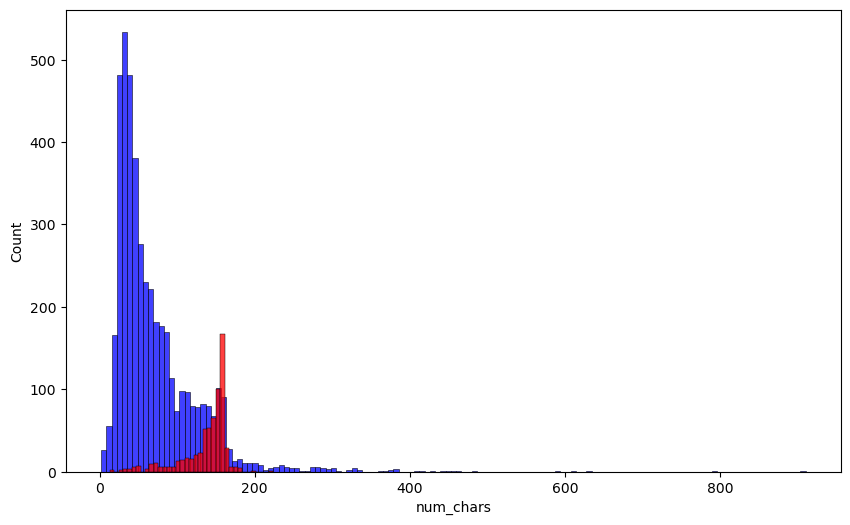

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['num_chars'],color='blue')
sns.histplot(data[data['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

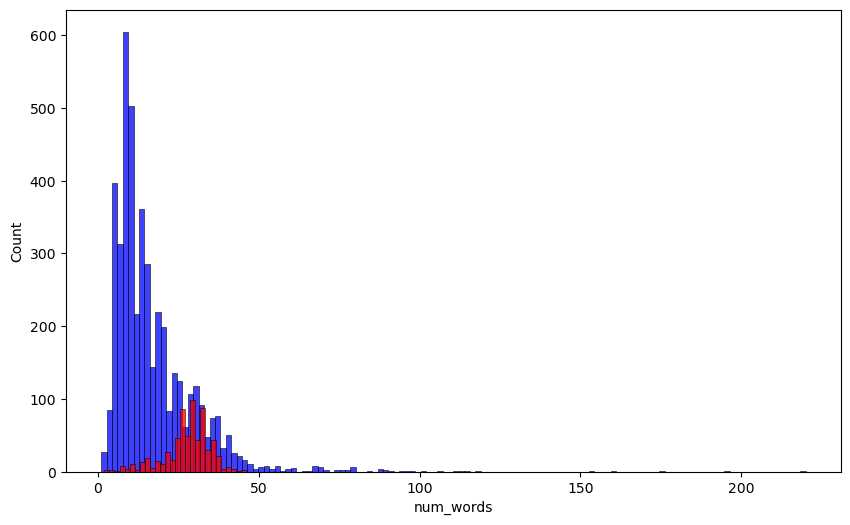

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['num_words'],color='blue')
sns.histplot(data[data['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sents', ylabel='Count'>

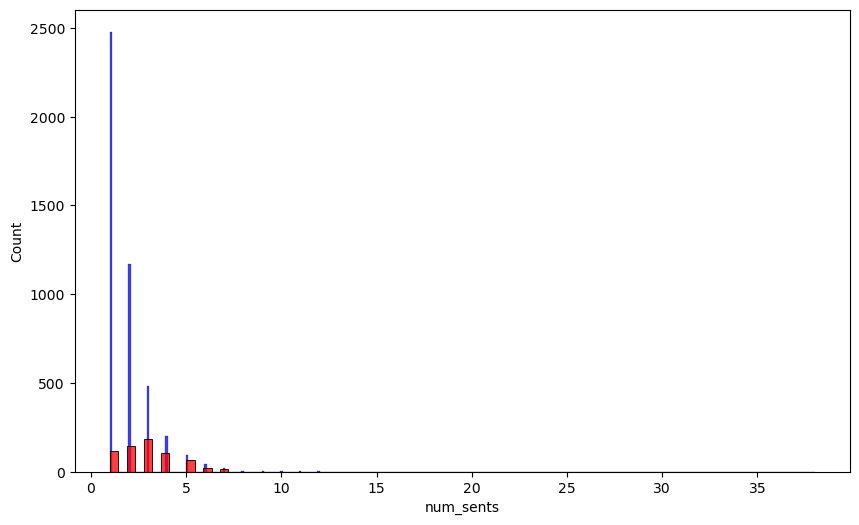

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['target']==0]['num_sents'],color='blue')
sns.histplot(data[data['target']==1]['num_sents'],color='red')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


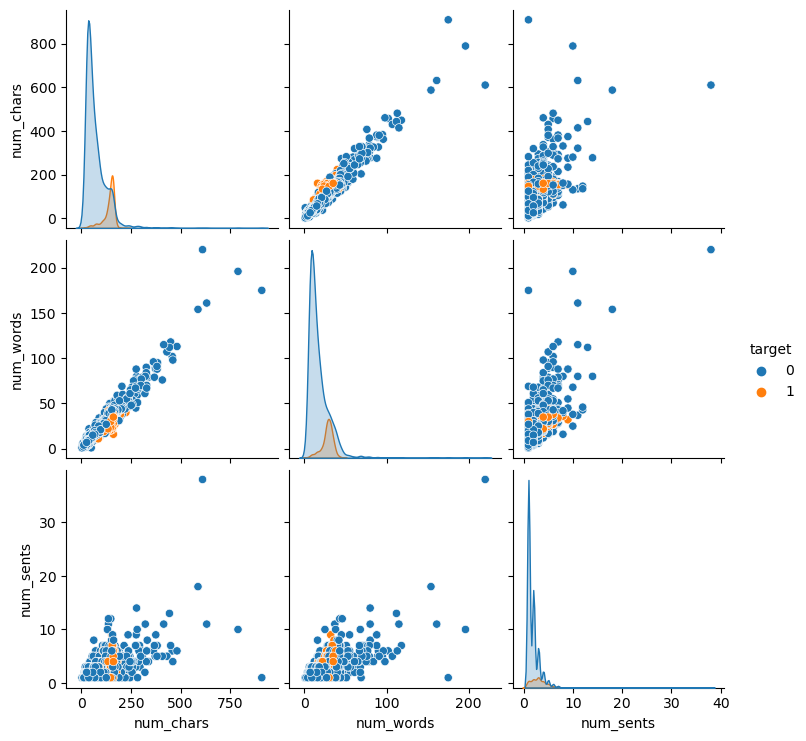

In [34]:
sns.pairplot(data,hue='target')

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [37]:
tnfrm_txt=transform_text(data['text'][10])
print('The original sentence:\n',data['text'][10])
print('The transformed sentence:\n',tnfrm_txt)

print('The stemmed version of \'loving\':',ps.stem('loving'))

The original sentence:
 I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
The transformed sentence:
 i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today
The stemmed version of 'loving': love


In [38]:
data['transform_text']=data['text'].apply(transform_text)

In [39]:
data.head()

,target,text,num_chars,num_words,num_sents,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int32 
 1   text            5169 non-null   object
 2   num_chars       5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sents       5169 non-null   int64 
 5   transform_text  5169 non-null   object
dtypes: int32(1), int64(3), object(2)
memory usage: 391.5+ KB


In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

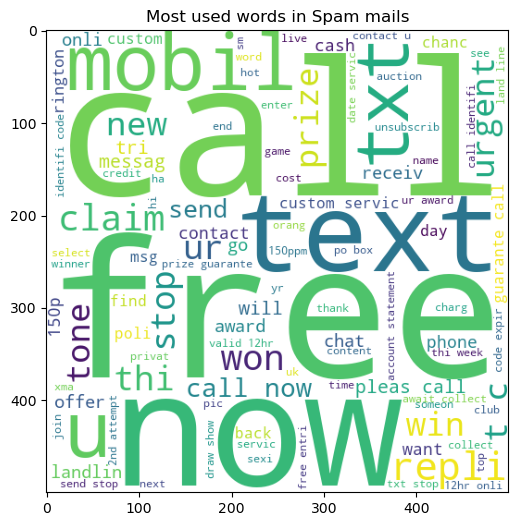

In [43]:
spam_wc=wc.generate(data[data['target']==1]['transform_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.title('Most used words in Spam mails')
plt.imshow(spam_wc)

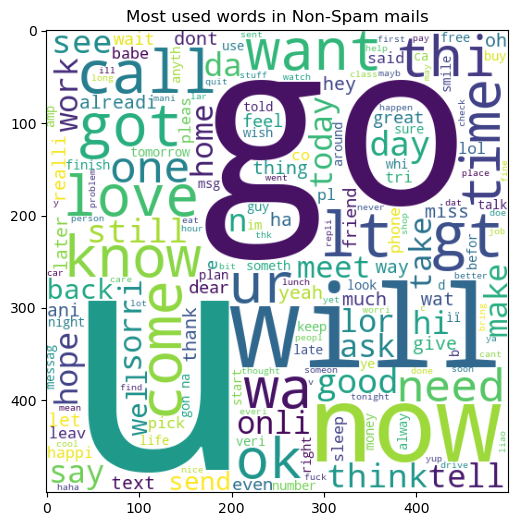

In [44]:
ham_wc=wc.generate(data[data['target']==0]['transform_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.title('Most used words in Non-Spam mails')
plt.imshow(ham_wc)

In [45]:
spam_corpus=[]
for msg in data[data['target']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

print(f'no.of words in spam:{len(spam_corpus)}')

no.of words in spam:14475


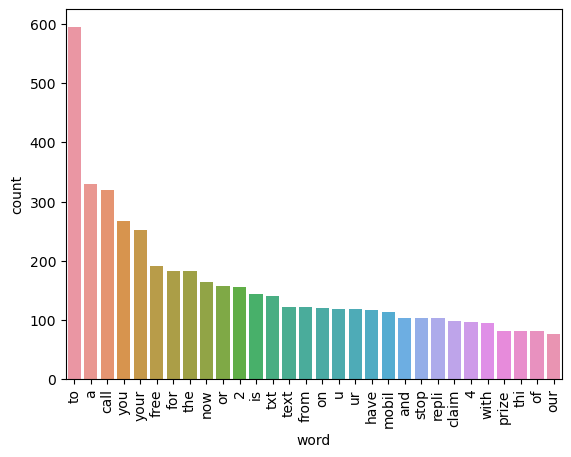

In [46]:
from collections import Counter
spam_corpus_dict = Counter(spam_corpus).most_common(30)
spam_corpus_df = pd.DataFrame(spam_corpus_dict, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
ham_corpus=[]
for msg in data[data['target']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

print(f'no.of words in ham:{len(ham_corpus)}')

no.of words in ham:62812


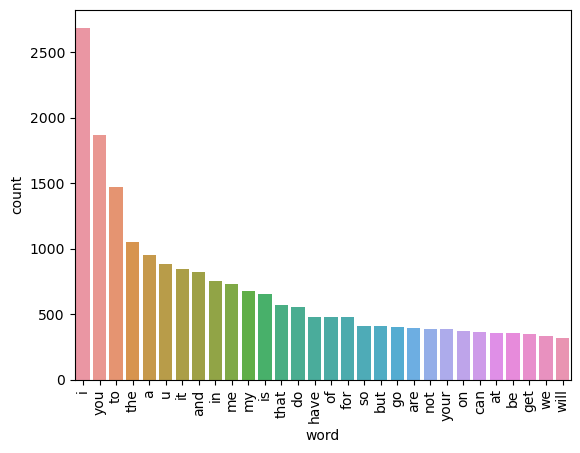

In [48]:
from collections import Counter
ham_corpus_dict = Counter(ham_corpus).most_common(30)
ham_corpus_df = pd.DataFrame(ham_corpus_dict, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
data.head()

,target,text,num_chars,num_words,num_sents,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidata=TfidfVectorizer(max_features=3000)

In [51]:
X=tfidata.fit_transform(data['transform_text']).toarray()

In [52]:
from sklearn.preprocessing import MinMaxScaler
slr=MinMaxScaler()
X=slr.fit_transform(X)

In [53]:
X.shape

(5169, 3000)

In [54]:
y=data['target'].values

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [56]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (3618, 3000)
X_test shape: (1551, 3000)
y_train shape: (3618,)
y_test shape: (1551,)


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
y1_pred=model1.predict(X_test)

In [59]:
print('Logistic Regression:')
print()
acc1=accuracy_score(y_test,y1_pred)
print('Accuracy score:',acc1)
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y1_pred))
print()
print('Classification report:\n',classification_report(y_test,y1_pred))

Logistic Regression:

Accuracy score: 0.9774339136041263

Confusion matrix:
 [[1348    3]
 [  32  168]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.98      0.84      0.91       200

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551



In [60]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)

In [61]:
print('Decision Tree Classifier:')
print()
acc2=accuracy_score(y_test,y2_pred)
print('Accuracy score:',acc2)
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y2_pred))
print()
print('Classification report:\n',classification_report(y_test,y2_pred))

Decision Tree Classifier:

Accuracy score: 0.9561573178594455

Confusion matrix:
 [[1317   34]
 [  34  166]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1351
           1       0.83      0.83      0.83       200

    accuracy                           0.96      1551
   macro avg       0.90      0.90      0.90      1551
weighted avg       0.96      0.96      0.96      1551



In [62]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)

In [63]:
print('K Neighbors Classifier:')
print()
acc3=accuracy_score(y_test,y3_pred)
print('Accuracy score:',acc3)
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y3_pred))
print()
print('Classification report:\n',classification_report(y_test,y3_pred))

K Neighbors Classifier:

Accuracy score: 0.9226305609284333

Confusion matrix:
 [[1351    0]
 [ 120   80]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1351
           1       1.00      0.40      0.57       200

    accuracy                           0.92      1551
   macro avg       0.96      0.70      0.76      1551
weighted avg       0.93      0.92      0.91      1551



In [64]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(X_train,y_train)
y4_pred=model4.predict(X_test)

In [65]:
print('Random Forest Classifier:')
print()
acc4=accuracy_score(y_test,y4_pred)
print('Accuracy score:',accuracy_score(y_test,y4_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y4_pred))
print()
print('Classification report:\n',classification_report(y_test,y4_pred))

Random Forest Classifier:

Accuracy score: 0.9709864603481625

Confusion matrix:
 [[1350    1]
 [  44  156]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.99      0.78      0.87       200

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551



In [66]:
from sklearn.svm import SVC
model5=SVC()
model5.fit(X_train,y_train)
y5_pred=model5.predict(X_test)

In [67]:
print('SVM:')
print()
acc5=accuracy_score(y_test,y5_pred)
print('Accuracy score:',accuracy_score(y_test,y5_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y5_pred))
print()
print('Classification report:\n',classification_report(y_test,y5_pred))

SVM:

Accuracy score: 0.9819471308833011

Confusion matrix:
 [[1350    1]
 [  27  173]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.99      0.86      0.93       200

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [68]:
from sklearn.naive_bayes import GaussianNB
model6=GaussianNB()
model6.fit(X_train,y_train)
y6_pred=model6.predict(X_test)

In [69]:
print('GaussianNB:')
print()
acc6=accuracy_score(y_test,y6_pred)
print('Accuracy score:',accuracy_score(y_test,y6_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y6_pred))
print()
print('Classification report:\n',classification_report(y_test,y6_pred))

GaussianNB:

Accuracy score: 0.8762088974854932

Confusion matrix:
 [[1180  171]
 [  21  179]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1351
           1       0.51      0.90      0.65       200

    accuracy                           0.88      1551
   macro avg       0.75      0.88      0.79      1551
weighted avg       0.92      0.88      0.89      1551



In [70]:
from sklearn.naive_bayes import BernoulliNB
model7=BernoulliNB()
model7.fit(X_train,y_train)
y7_pred=model7.predict(X_test)

In [71]:
print('BernoulliNB:')
print()
acc7=accuracy_score(y_test,y7_pred)
print('Accuracy score:',accuracy_score(y_test,y7_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y7_pred))
print()
print('Classification report:\n',classification_report(y_test,y7_pred))

BernoulliNB:

Accuracy score: 0.9838813668600903

Confusion matrix:
 [[1347    4]
 [  21  179]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.98      0.90      0.93       200

    accuracy                           0.98      1551
   macro avg       0.98      0.95      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [72]:
from sklearn.naive_bayes import MultinomialNB
model8=MultinomialNB()
model8.fit(X_train,y_train)
y8_pred=model8.predict(X_test)

In [73]:
print('MultinomialNB:')
print()
acc8=accuracy_score(y_test,y8_pred)
print('Accuracy score:',accuracy_score(y_test,y8_pred))
print()
print('Confusion matrix:\n',confusion_matrix(y_test,y8_pred))
print()
print('Classification report:\n',classification_report(y_test,y8_pred))

MultinomialNB:

Accuracy score: 0.9851708575112831

Confusion matrix:
 [[1348    3]
 [  20  180]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1351
           1       0.98      0.90      0.94       200

    accuracy                           0.99      1551
   macro avg       0.98      0.95      0.97      1551
weighted avg       0.99      0.99      0.98      1551



In [74]:
results=pd.DataFrame({
    'Models':['LogisticRegression','DecisionTree','KNeighbours','RandomForest','SVM','GaussianNB','BernoulliNB','MultinomialNB'],
    'Score': [acc1*100 , acc2*100 ,acc3*100 , acc4*100, acc5*100, acc6*100, acc7*100, acc8*100]}).sort_values(by='Score',ascending=False)
results

,Models,Score
7,MultinomialNB,98.517086
6,BernoulliNB,98.388137
4,SVM,98.194713
0,LogisticRegression,97.743391
3,RandomForest,97.098646
1,DecisionTree,95.615732
2,KNeighbours,92.263056
5,GaussianNB,87.620890


<Axes: xlabel='Models'>

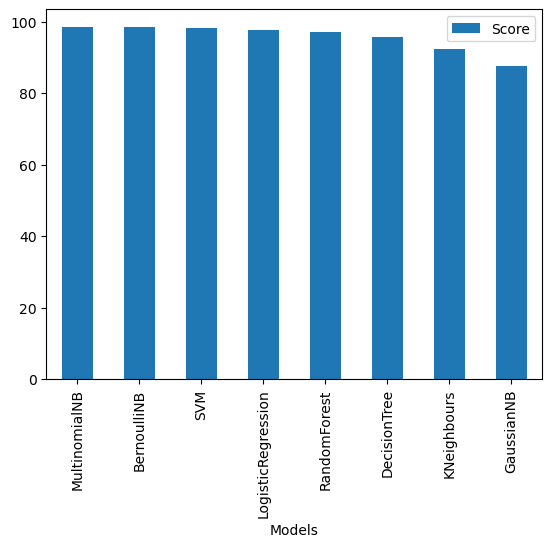

In [75]:
results.plot.bar(x='Models',y='Score')